In [6]:
from datetime import timedelta
import torch
from torch.autograd import Variable
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, models,transforms
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import TensorDataset, DataLoader,random_split
import numpy as np 
import pandas as pd
import os
import time
import random
import matplotlib.pyplot as plt 
from torch.autograd import Function
from collections import OrderedDict
import torch.nn as nn
import math
import torchvision.models as models
import pickle
from tqdm.auto import tqdm
import cv2
import wandb
from sklearn.model_selection import KFold
# from torchsummary import summary
import glob
from sklearn.manifold import TSNE
import seaborn as sns
import collections
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
import umap.umap_ as UMAP
import pims

/home/anagara8/.conda/envs/pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Loading all frames
start = time.time()
all_frames_list = np.load("all_frame_and_action_list.npy")
end = time.time()
print("Training File List containing", len(all_frames_list), "frames loaded in:", end - start)

Training File List containing 8387210 frames loaded in: 1.2450785636901855


FC-A_08-07-18_preexposurevideo_2018Y_08M_09D_05h_16m_09s_cam_17202346-0000_100832.jpg


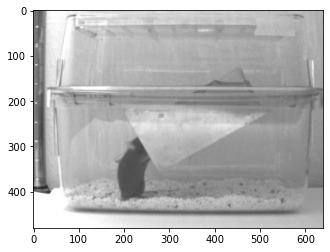

In [13]:
frame = all_frames_list[0]
frame = cv2.imread("/media/data_cifs/anagara8/preexposure_action/" + frame)

plt.imshow(frame)

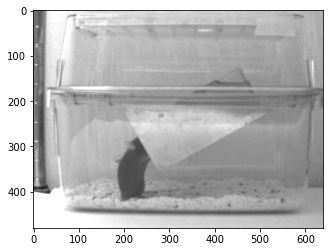

In [15]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

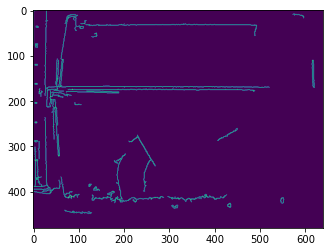

In [24]:
img_edges = cv2.Canny(gray,  80, 210, 3)
plt.imshow(img_edges)

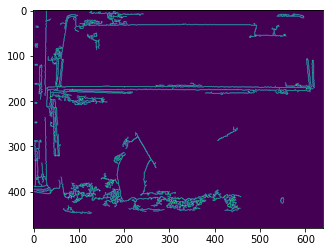

In [42]:
img_edges = cv2.Canny(gray,  25, 210, 2)
plt.imshow(img_edges)

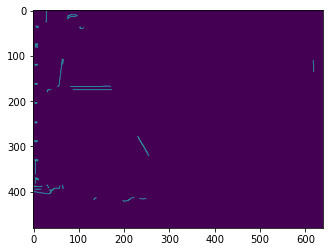

In [76]:
img_edges = cv2.Canny(gray,  200, 300, 4)
plt.imshow(img_edges)

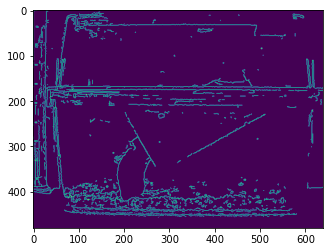

In [73]:
ret, img_thresh = cv2.threshold(img_edges, 254, 255,cv2.THRESH_BINARY)
plt.imshow(img_thresh)

In [74]:
contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)

(array([[[276, 456]]], dtype=int32), array([[[445, 455]]], dtype=int32), array([[[517, 454]],

       [[520, 454]]], dtype=int32), array([[[480, 454]],

       [[481, 454]]], dtype=int32), array([[[335, 454]],

       [[337, 454]]], dtype=int32), array([[[545, 453]],

       [[549, 453]]], dtype=int32), array([[[493, 453]]], dtype=int32), array([[[456, 453]],

       [[458, 453]],

       [[459, 454]],

       [[460, 454]],

       [[461, 453]],

       [[460, 454]],

       [[459, 454]],

       [[458, 453]]], dtype=int32), array([[[442, 453]],

       [[443, 453]]], dtype=int32), array([[[428, 453]],

       [[431, 453]]], dtype=int32), array([[[377, 453]],

       [[376, 454]],

       [[375, 454]],

       [[376, 454]]], dtype=int32), array([[[362, 453]]], dtype=int32), array([[[359, 453]]], dtype=int32), array([[[327, 453]],

       [[326, 454]],

       [[322, 454]],

       [[326, 454]],

       [[327, 453]],

       [[328, 453]]], dtype=int32), array([[[278, 453]]], dtype=int32

In [59]:
for c in contours:
        # ref: https://docs.opencv.org/trunk/dd/d49/tutorial_py_contour_features.html
        (x, y), radius = cv2.minEnclosingCircle(c)
        radius = int(radius)
        print(x, y, radius)

        #Take only the valid circle(s)
#         if (radius > min_radius_thresh) and (radius < max_radius_thresh):
#             centers.append(np.array([[x], [y]]))

98.0 441.5 31
311.0 430.0 6
306.5400085449219 430.5 12
437.7608642578125 429.7608642578125 8
550.5 419.0 6
212.0 416.5 15
253.0 415.0 35
339.0 414.5 42
134.5 408.5 10
416.9817199707031 410.0 41
21.0 396.0 13
170.43055725097656 415.09375 27
20.0 399.5 20
135.0 395.5 13
126.5 384.5 4
49.0 385.5 14
88.78840637207031 388.81683349609375 35
274.05126953125 375.8791809082031 48
7.0 357.0 28
191.00637817382812 368.9269714355469 41
193.0 324.0 12
190.59091186523438 323.5909118652344 14
7.0 309.5 17
6.0 288.0 3
14.5 306.5 20
239.62649536132812 313.11932373046875 46
429.0 273.5 25
6.0 247.0 2
15.0 315.3291015625 80
41.5 268.5 53
6.0 204.0 2
119.5 198.5 43
67.5 190.5 5
53.0 191.5 11
62.5 184.5 21
138.5 181.5 65
149.5 178.5 69
47.0 249.0 72
147.5 174.5 79
39.0 193.5 21
383.0 175.5 155
40.0 170.5 10
6.5 162.0 2
17.0 158.0 38
6.5 120.0 2
618.5 140.0 30
325.5 138.0 294
7.0 80.0 2
7.5 75.0 2
130.69822692871094 58.98225021362305 12
96.5 42.0 6
8.5 36.5 2
27.5 108.0 80
120.5 26.5 17
337.0 44.0 221
100.0 